# LIFE EXPECTANCY AND GROSS DOMESTIC PRODUCT

This project will analyse the dataset on life expectancy and Gross Domestic Product (aka GDP) of Chile, China, Germany, Mexico, the United States and Zimbabwe from 2000 to 2014 in order to assess the relationship between the two features of these countries using Python libraries Matplotlib and Seaborn.

This project is intended to aswer the following questions:
1. Is there any relationship between GDP and life expectancy?
2. Has the relationship changed over time?
3. Is the relationship the same in the six countries?

*Data source*

-World Health Organization and World Bank

## Importing Python Libraries
This project will be using Matplotlib and Seaborn libraries to plot data. Also, this project will use Pandas and Numpy libraries to work on the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Loading the data and reporting preliminary inspection results

The data in the file *'all_data.csv'* were loaded into a pandas dataframe called `df` using Pandas' method `read_csv`.
Then, a preliminary inpection was performed using `head()` and `info()` methods.

In [2]:
# Load the data
df = pd.read_csv("all_data.csv")
print(df.head())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


#### Some findings

According to this preliminary inspection:

- There are 96 entries and 4 columns.

- It seems there are not missing data as long as all the 96 rows have non-null values.

- The data in the feature *GDP* are on a log scale for the first five entries which might demand some processing.

- The countries are Chile, China, Germany, Mexico, the United States, and Zimbabwe.

## 2. Exploring data with visualization

### 2.1 Life expectancy over time

First of all, it is crucial to check how life expectancy varied from 2000 to 2014 to assess whether its relationship with GDP has changed in these countries.


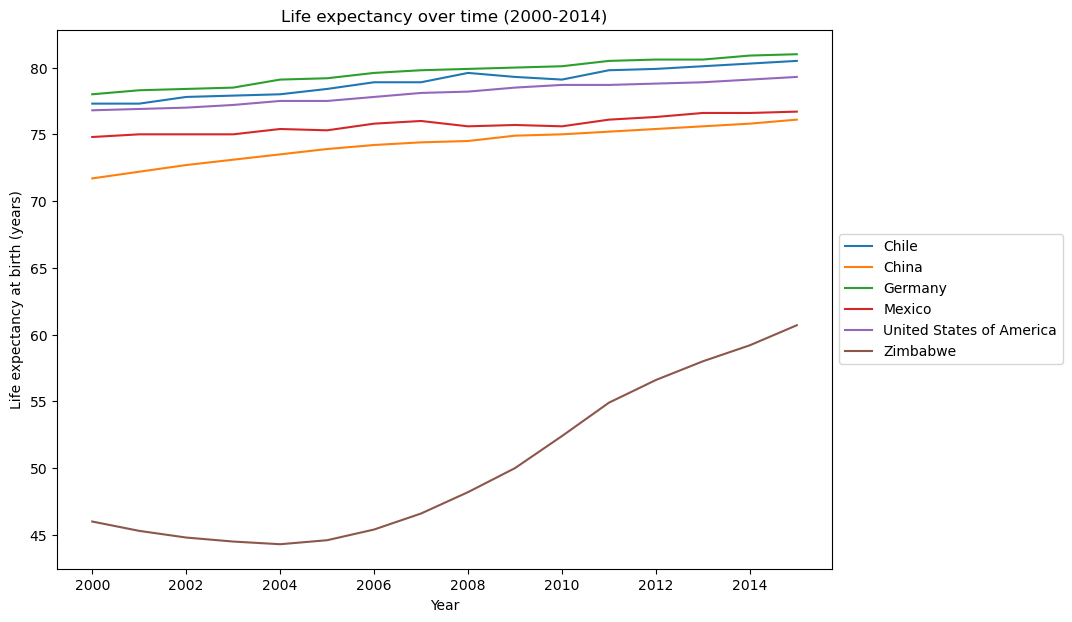

<Figure size 640x480 with 0 Axes>

In [5]:
# Life expectancy over time
plt.figure(figsize=(10, 7))
sns.lineplot(x = 'Year', y= 'Life expectancy at birth (years)', hue = 'Country', data=df)
plt.title('Life expectancy over time (2000-2014)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()
plt.clf()

#### Some findings

As shown above, while life expectancy have increased a little bit in most countries, there was a significant increase in Zimbabwe from 2006. Life expectancy of Zimbabwe was about 45 years in 2004 and scaled to over 60 years by 2014.

### 2.2  Mean of the life expectancy

According to the table below, Germany has the highest life expectancy mean rate, followed by Chile and the United States. The lowest mean rate belongs to Zimbabwe.

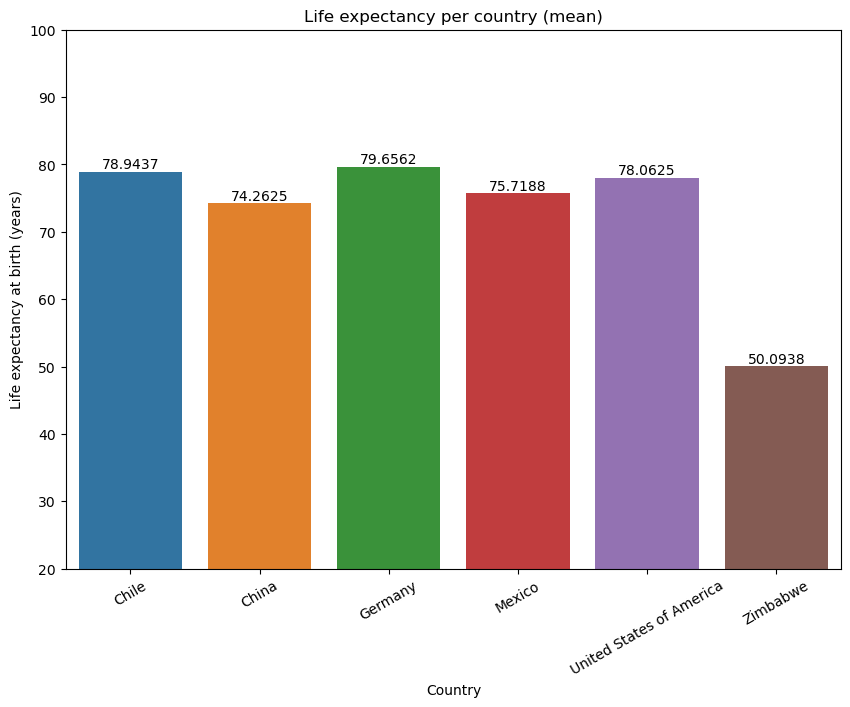

<Figure size 640x480 with 0 Axes>

In [24]:
# Mean of life expectancy (in years)
plt.figure(figsize=(10, 7))
ax = sns.barplot(x= 'Country', y = 'Life expectancy at birth (years)', data=df, errwidth=0)
plt.ylim(20, 100)
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('Life expectancy per country (mean)')
plt.show()
plt.clf()

### 2.3 Gross Domestic Product over time

Next,it is time to spot changes in the Gross Domestic Product - GDP over time.

In order to facilitate the visualization, a log transformation was performed before plotting.

In [7]:
#Log transformation
df2 = df
df2['GDP'] = df.GDP.apply(lambda x: np.log(x))


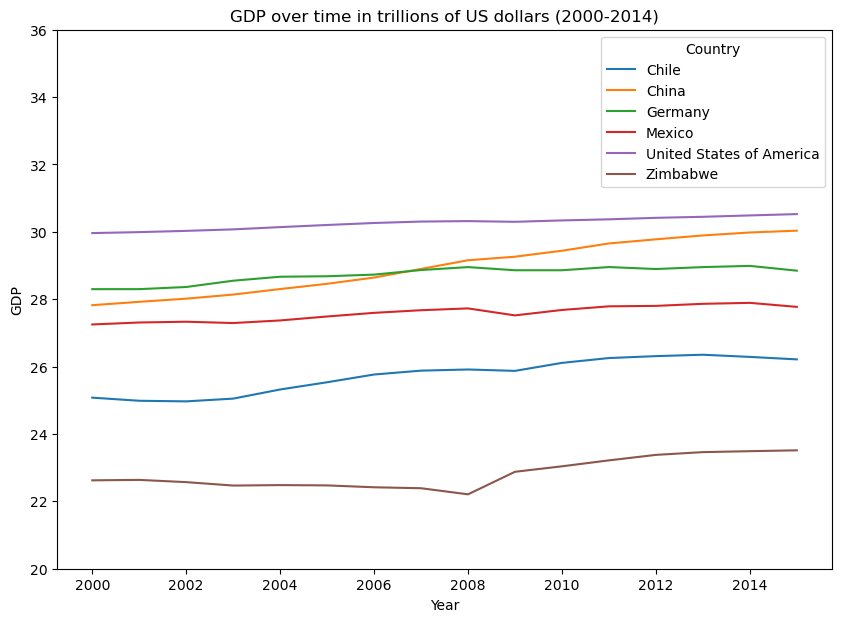

<Figure size 640x480 with 0 Axes>

In [9]:
# GDP over time
plt.figure(figsize=(10,7))
plt.ylim(20, 36)
sns.lineplot(x= 'Year', y= 'GDP', hue= 'Country', data=df2)
plt.title('GDP over time in trillions of US dollars (2000-2014)')
plt.show()
plt.clf()

#### China's GDP in 2000 and in 2014:

In [29]:
GDP_2000 = df.loc[df['Year'] == 2000]
GDP_2000_China = GDP_2000.loc[GDP_2000['Country'] == 'China']
GDP_2014 = df.loc[df['Year'] == 2014]
GDP_2014_China = GDP_2014.loc[GDP_2014['Country'] == 'China']
print(GDP_2000_China)
print(GDP_2014_China)

   Country  Year  Life expectancy at birth (years)        GDP
16   China  2000                              71.7  27.822757
   Country  Year  Life expectancy at birth (years)        GDP
30   China  2014                              75.8  29.980719


#### Some findings

Based on the above graph, GDP have not varied so much along these years, except for China, whose GDP increased about US$ 2 trillions.

China's GDP has exceeded Germany's GDP from around 2007 and kept higher by 2014.


### 2.4 Distribution of the Gross Domestic Product

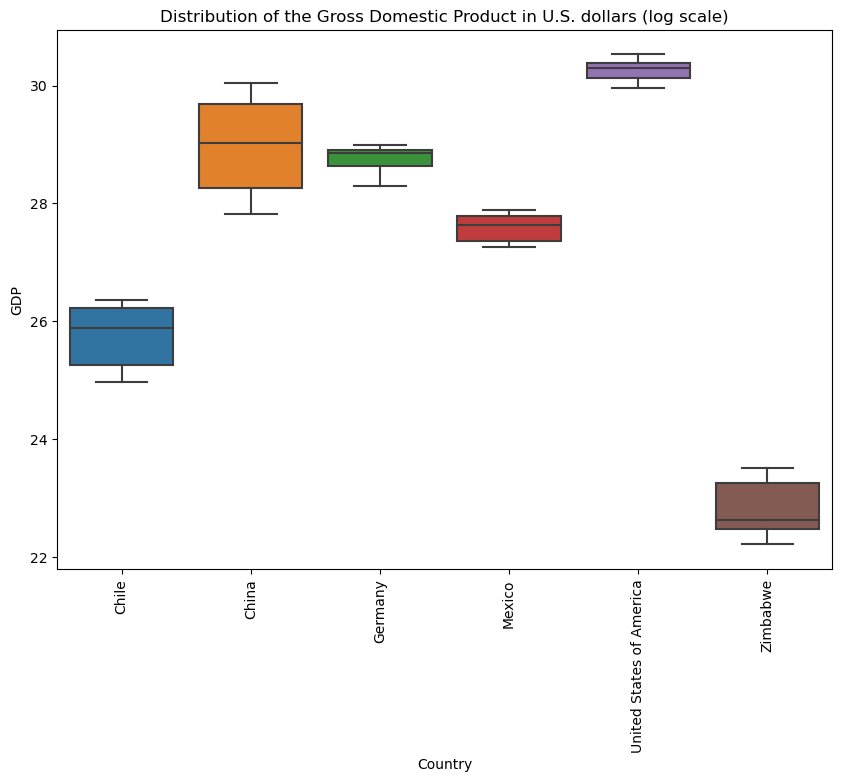

<Figure size 640x480 with 0 Axes>

In [54]:
# Distribution of the Gross Domestic Product in trillions of U.S. dollars
plt.figure(figsize=(10,7))
ax = sns.boxplot(x=df2.Country, y=df2.GDP)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Distribution of the Gross Domestic Product in U.S. dollars (log scale)')
plt.show()
plt.clf()

#### Chile's GDP in 2000 and in 2014

In [30]:
GDP_2000 = df.loc[df['Year'] == 2000]
GDP_2000_Chile = GDP_2000.loc[GDP_2000['Country'] == 'Chile']
GDP_2014 = df.loc[df['Year'] == 2014]
GDP_2014_Chile = GDP_2014.loc[GDP_2014['Country'] == 'Chile']
print(GDP_2000_Chile)
print(GDP_2014_Chile)

  Country  Year  Life expectancy at birth (years)       GDP
0   Chile  2000                              77.3  25.07819
   Country  Year  Life expectancy at birth (years)        GDP
14   Chile  2014                              80.3  26.287748


#### Zimbabwe's GDP in 2000 and in 2014

In [31]:
GDP_2000 = df.loc[df['Year'] == 2000]
GDP_2000_Zimbabwe = GDP_2000.loc[GDP_2000['Country'] == 'Zimbabwe']
GDP_2014 = df.loc[df['Year'] == 2014]
GDP_2014_Zimbabwe = GDP_2014.loc[GDP_2014['Country'] == 'Zimbabwe']
print(GDP_2000_Zimbabwe)
print(GDP_2014_Zimbabwe)

     Country  Year  Life expectancy at birth (years)        GDP
80  Zimbabwe  2000                              46.0  22.623873
     Country  Year  Life expectancy at birth (years)        GDP
94  Zimbabwe  2014                              59.2  23.489022


#### Some findings

Based on the graph above, the spread of the GDP of the United States, Germany, and Mexico is small whereas the spread of Chile's GDP has varied about US\\$ 1.2 trillions and the spread of Zimbabwe's GDP has varied about US\\$ 700 billions.

Not only China but also Chile and Zimbabwe have experienced an economic growth over these years.

The United States' GDP value is the highest whereas Zimbabwe's GDP value is the lowest.

### 2.5 Gross Domestic Product and Life Expectancy

Now it is time to analyse the relationships between GDP and life expectancy.

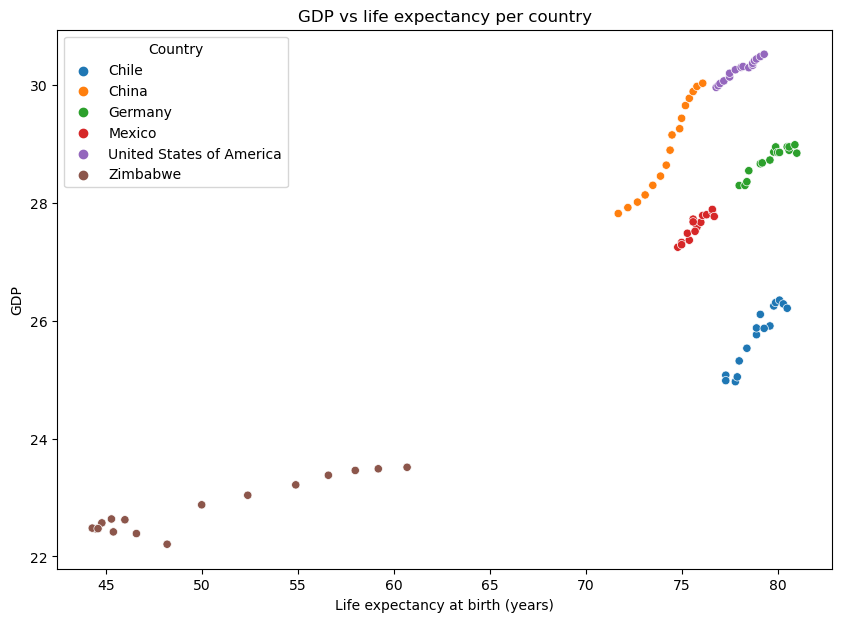

<Figure size 640x480 with 0 Axes>

In [80]:
#GDP vs life expectancy per country
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Life expectancy at birth (years)', y='GDP', hue='Country', data=df)
plt.title('GDP vs life expectancy per country')
plt.show()
plt.clf()

#### Some findings

As seen above, all these countries have had an increase of the GDP figures, but only Zimbabwe's life expectancy has increased significantly.

## 3. Conclusions

It seems there are two different scenarios when it comes to the relationship between life expectancy and GDP: one for countries which life expectancy rates are over 70 years and another for countries which these rates are below 50.

The increase of the GDP may have had some impact on Zimbabwe's life expectancy rates. Zimbabwe have had the lowest GDP and life expectancy rates over this time series. Nonetheless, the small growth of the GDP seemingly boosted a sharp increase of its life expectancy rates.

On the other hand, the significant increase of the China's GDP over this time series has had little impact on the country's life expectancy. Despite having the highest GDP figures, the United States have not had the highest life expectancy rates whereas Chile has had the second highest life expectancy although its low GDP.

The data suggests that the growth of GDP may prompt an improvement of the life expectancy rates when these are low. However, where life expectancy rates are above 70 years, the growth of the GDP seemingly has little impact on the growth of the life expectancy rates.

The correlation between life expectancy rates and GDP is not strong in the latter scenario, suggesting that other factors interfere with the life expectancy.